In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [80]:
df = pd.read_csv("DataSet_Tesco5000_withDaynum.csv")

In [81]:
df.shape

(596733, 4)

In [82]:
df["customer_id"].nunique()

5000

In [83]:
customer_df = df.groupby("customer_id")["visit_spend"].agg(["count", "mean"])

In [84]:
customer_df.head()

count        mean
customer_id                   
2              125   20.961280
3              167   27.606707
4              100  106.954800
5              133   31.074436
6               64   55.112344

Text(0, 0.5, 'Vásárlás db')

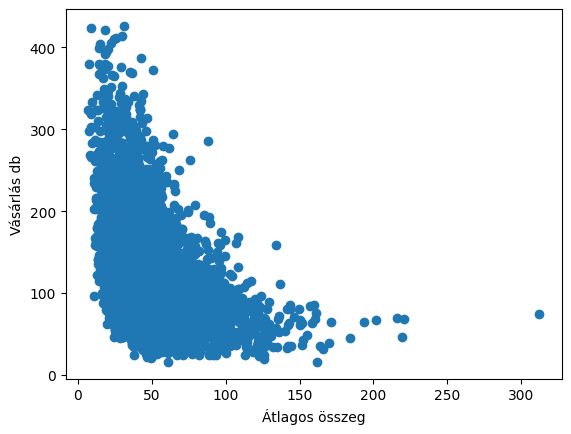

In [85]:
plt.scatter(customer_df["mean"], customer_df["count"])
plt.xlabel("Átlagos összeg")
plt.ylabel("Vásárlás db")

In [86]:
X_cols = ["count", "mean"]

X = customer_df.loc[:, X_cols]

In [87]:
model = KMeans(n_clusters=2, random_state=0)
model.fit(X)
customer_df["cluster"] = model.predict(X)

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [88]:
plt.scatter(customer_df["mean"], customer_df["count"], c=customer_df["cluster"])

In [89]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [90]:
model = KMeans(n_clusters=2, random_state=0)
model.fit(X_scaled)
customer_df["cluster_scaled"] = model.predict(X_scaled)

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [91]:
plt.scatter(customer_df["mean"], customer_df["count"], c=customer_df["cluster_scaled"])
plt.xlabel("Átlagos összeg")
plt.ylabel("Vásárlás db")

Text(0, 0.5, 'Vásárlás db')

In [92]:
ssc_list = []
for n_clusters in range(2, 10):
    model = KMeans(n_clusters=n_clusters, random_state=0)
    model.fit(X_scaled)
    ssc = model.inertia_
    ssc_list.append(ssc)

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

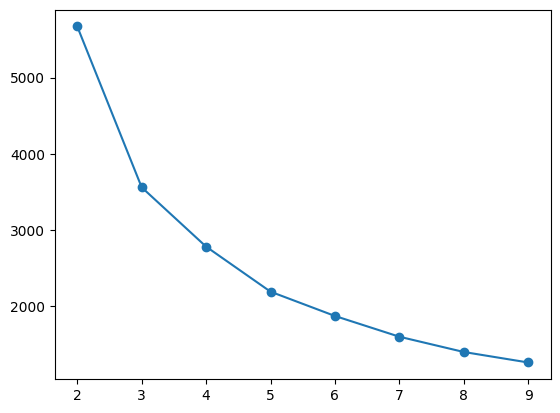

In [93]:
plt.plot(range(2, 10), ssc_list, marker="o")

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Vásárlás db')

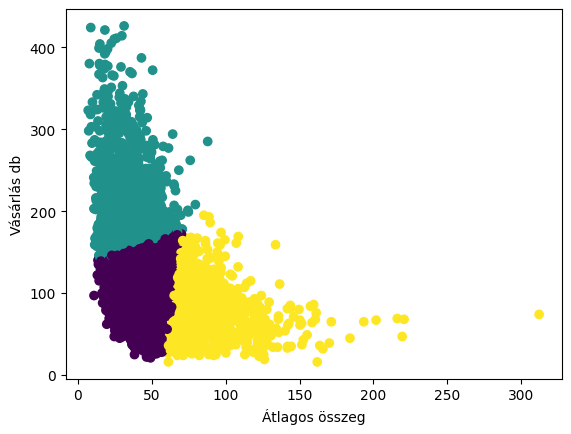

In [94]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(X_scaled)
customer_df["cluster_scaled"] = model.predict(X_scaled)
plt.scatter(customer_df["mean"], customer_df["count"], c=customer_df["cluster_scaled"])
plt.xlabel("Átlagos összeg")
plt.ylabel("Vásárlás db")

In [95]:
centroids_scaled = pd.DataFrame(model.cluster_centers_, columns=X_cols)
centroids = scaler.inverse_transform(centroids_scaled)

In [96]:
centroids

array([[ 98.1066867 ,  43.48588902],
       [213.14695652,  32.95687406],
       [ 76.13973064,  84.87626262]])

# Második feladat

In [97]:
df["visit_date"] = pd.to_datetime(df["visit_date"])

In [98]:
df["day_of_week"] = df["visit_date"].dt.dayofweek + 1

In [99]:
df.head()

customer_id visit_date  visit_spend  daynum  day_of_week
0            2 2010-04-01         5.97       0            4
1            2 2010-04-06        12.71       5            2
2            2 2010-04-07        34.52       6            3
3            2 2010-04-12         7.89      11            1
4            2 2010-04-14        17.17      13            3

In [100]:
customer_df = df.groupby(["customer_id", "day_of_week"])["visit_spend"].sum().unstack().fillna(0)

In [101]:
X = customer_df.loc[:, range(1, 8)]

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='day_of_week'>

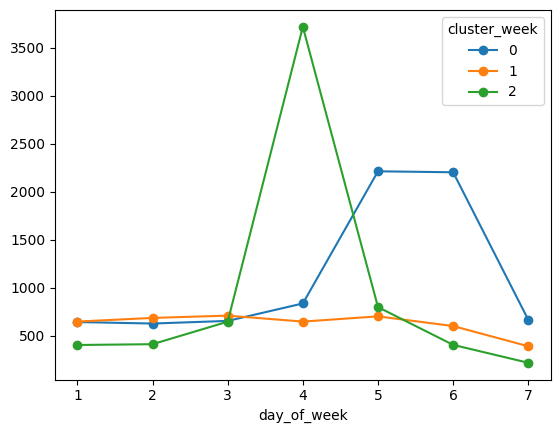

In [102]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(X)
customer_df["cluster_week"] = model.predict(X)
customer_df.groupby("cluster_week")[X.columns].mean().T.plot(marker="o")

In [103]:
customer_df["cluster_week"].value_counts()

cluster_week
1    3432
0    1154
2     414
Name: count, dtype: int64

In [104]:
customer_df["sum"] = customer_df.loc[:, range(1, 8)].sum(axis=1)

In [105]:
for i in range(1, 8):
    customer_df["ratio_" + str(i)] = customer_df[i] / customer_df["sum"]

In [106]:
customer_df.head()

day_of_week        1        2        3        4        5        6       7   
customer_id                                                                 
2             209.66   316.59   271.62   150.70  1130.00   400.77  140.82  \
3             259.35   268.16   231.53   752.57   295.20  2319.12  484.39   
4            1363.53  1242.90  2130.12  1566.87  1609.84  1920.61  861.61   
5             417.31   781.38   468.27   658.71   754.29   894.19  158.75   
6            2625.55   356.37    89.42    56.62   312.15    87.08    0.00   

day_of_week  cluster_week       sum   ratio_1   ratio_2   ratio_3   ratio_4   
customer_id                                                                   
2                       1   2620.16  0.080018  0.120828  0.103665  0.057516  \
3                       1   4610.32  0.056254  0.058165  0.050220  0.163236   
4                       0  10695.48  0.127487  0.116208  0.199161  0.146498   
5                       1   4132.90  0.100973  0.189063  0.113303  0.159382   
6                       1   3527.19  0.744374  0.101035  0.025352  0.016052   

day_of_week   ratio_5   ratio_6   ratio_7  
customer_id                                
2            0.431271  0.152956  0.053745  
3            0.064030  0.503028  0.105066  
4            0.150516  0.179572  0.080558  
5            0.182509  0.216359  0.038411  
6            0.088498  0.024688  0.000000

In [107]:
model = KMeans(n_clusters=5, random_state=0)
X_cols = [i for i in customer_df.columns if "ratio" in str(i)]
model.fit(customer_df.loc[:, X_cols])
customer_df["cluster_week"] = model.predict(customer_df.loc[:, X_cols])
customer_df.groupby("cluster_week")[X.columns].mean().T.plot(marker="o")

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='day_of_week'>

# Harmadik rész

In [108]:
df["year_month"] = df["visit_date"].apply(lambda x: str(x)[:7])

In [112]:
customer_df = df.groupby(["customer_id", "year_month"])["visit_spend"].count().unstack().fillna(0)

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='year_month'>

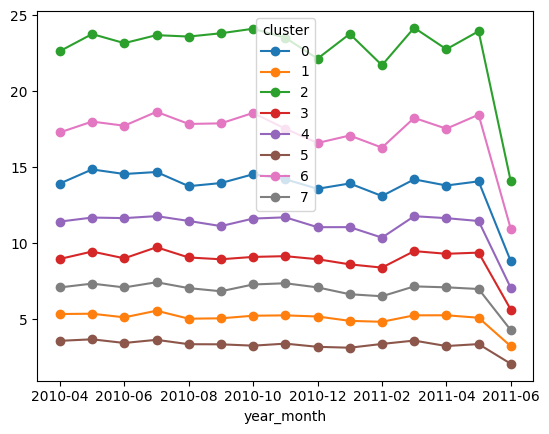

In [113]:
X_cols = customer_df.columns.to_list()
X = customer_df.loc[:, X_cols]
model = KMeans(n_clusters=8, random_state=0)
model.fit(X)
customer_df["cluster"] = model.predict(X)
customer_df.groupby("cluster")[X_cols].mean().T.plot(marker="o")